In [44]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]

In [57]:
rate = 44100

nperseg  = 11025//4
noverlap = nperseg // 100 * 92
step = nperseg - noverlap


f_N = nperseg // 1


t_chunk = np.linspace(0, nperseg / rate, nperseg)
f = np.geomspace(30, nperseg//2, f_N) # second arg: nperseg//2 (Nyquist limit)


T_chunk, F_chunk = np.meshgrid(t_chunk, f)
E = 1/2j * (
    np.exp(-2j * np.pi * 1 * F_chunk * T_chunk) / 1 + 
    np.exp(-2j * np.pi * 2 * F_chunk * T_chunk) / 2 +
    np.exp(-2j * np.pi * 3 * F_chunk * T_chunk) / 3 +
    np.exp(-2j * np.pi * 4 * F_chunk * T_chunk) / 4 +
    np.exp(-2j * np.pi * 5 * F_chunk * T_chunk) / 5 +
    np.exp(-2j * np.pi * 6 * F_chunk * T_chunk) / 6 +
    np.exp(-2j * np.pi * 7 * F_chunk * T_chunk) / 7
)
E.shape
# for i in range(0, N, step):
#     chunk = signal[i : i + nperseg]
#     chunk = chunk * np.blackman(nperseg)
#     corr = E @ chunk
#     magnitude = np.abs(corr)


(2756, 2756)

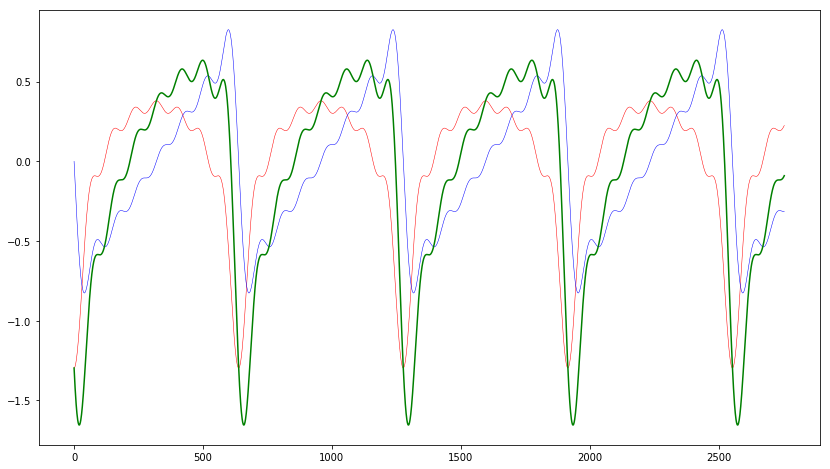

In [58]:
i = 600
plt.plot(np.imag(E[i]), 'r', linewidth=0.5)
plt.plot(np.real(E[i]), 'b', linewidth=0.5)
sawtooth = np.real(E[i]) + np.imag(E[i])
plt.plot(sawtooth, 'g')

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


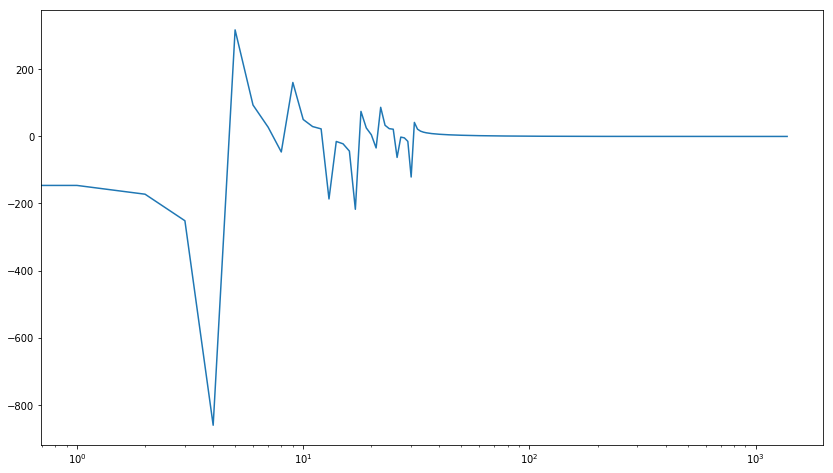

In [60]:
l = len(sawtooth)
plt.semilogx(np.fft.fft(sawtooth)[:l//2])

In [ ]:
cos(w1) + cos(w2) + sin(w1) + cos(w2) = e^(jw1) + e^(jw2)

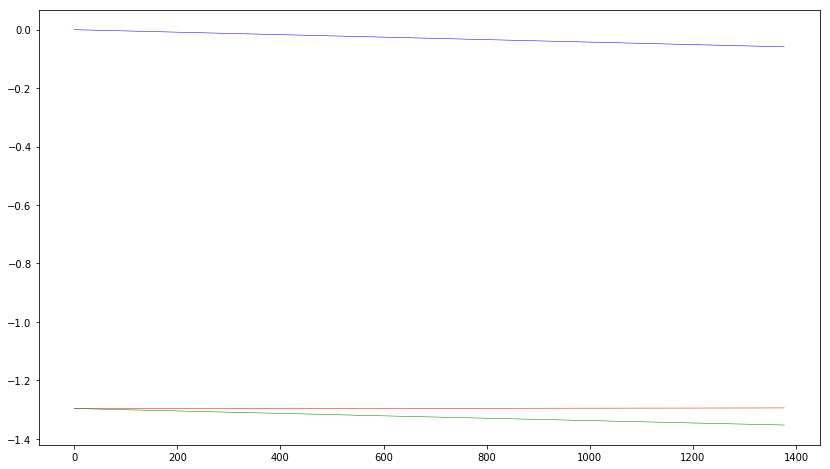

In [49]:
i = 600
plt.plot(np.imag(E[i]), 'r', linewidth=0.5)
plt.plot(np.real(E[i]), 'b', linewidth=0.5)

plt.plot(np.real(E[i]) + np.imag(E[i]), 'g', linewidth=0.5)

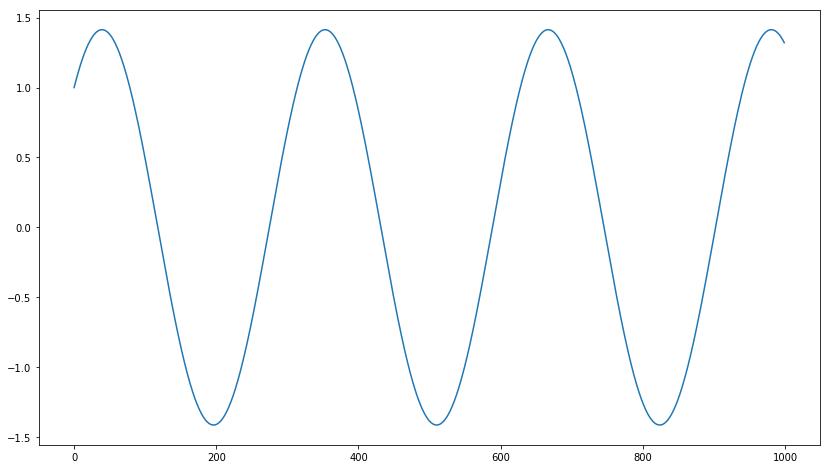

In [65]:
t = np.linspace(0, 10, 1000)
x = np.cos(2*t) + np.sin(2*t)
plt.plot(x)

# phase test
1. take some sine wave signal
2. correlate it with sinewave of same frequency but different phases
3. plot `phase-correlation` plot

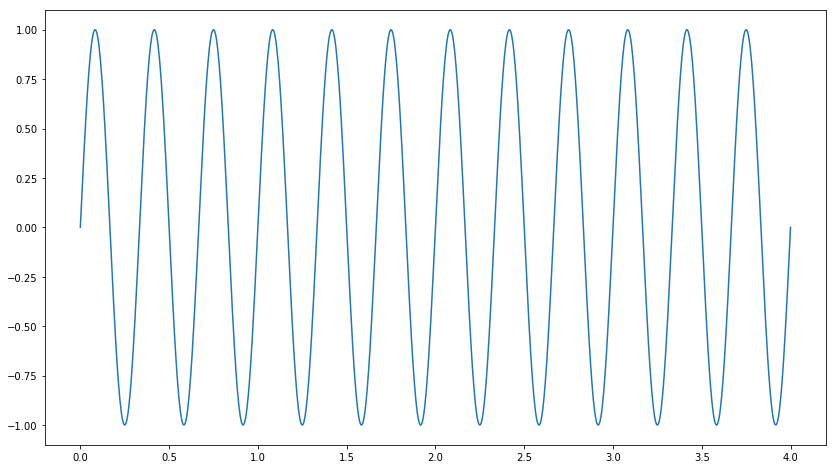

In [70]:
t = np.linspace(0, 4, 1024)
f = 3 # Hz
signal = np.sin(2*np.pi*f*t)
plt.plot(t, signal)

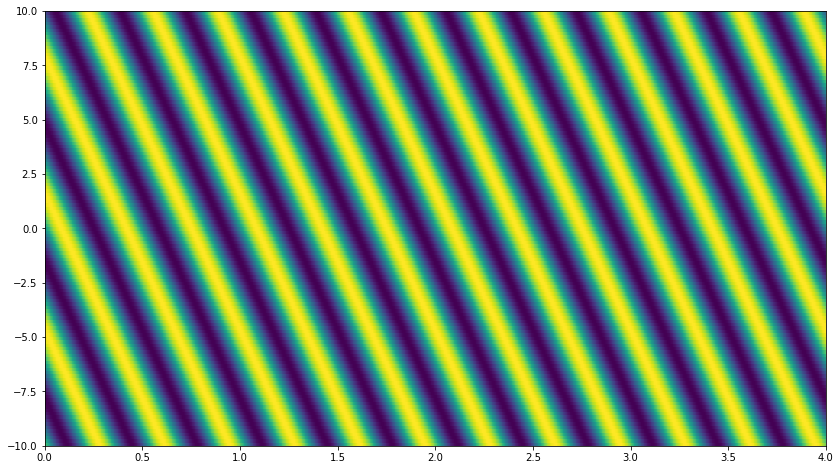

In [79]:
phases = np.linspace(-10, 10, 128)

T, P = np.meshgrid(t, phases)

SDP = np.sin(2*np.pi*f*T + P) # Sines of Different Phases

plt.pcolormesh(T, P, SDP)

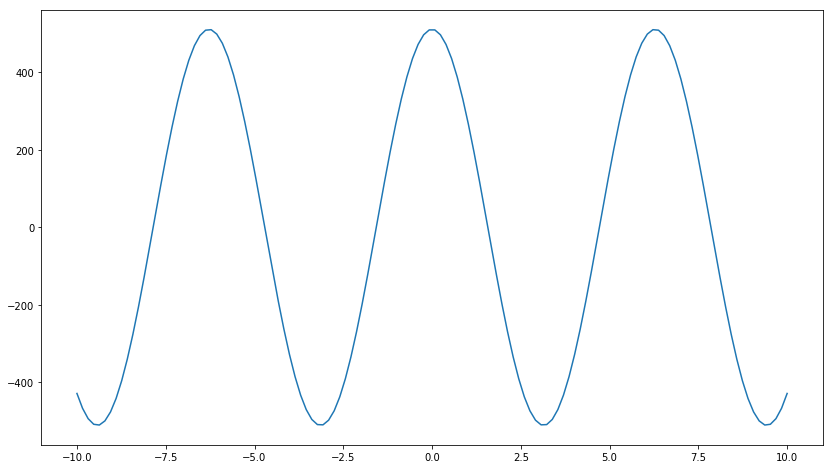

In [80]:
corr = SDP @ signal
plt.plot(phases, corr)

# plain `cos` correlation spectrogram
короче пробую протестировать корелляцию чисто с sin (или cos). Without exponentials. Yeah, this is somewhat wrong, but I'll try to compensate this by big window overlap (90%)

88200


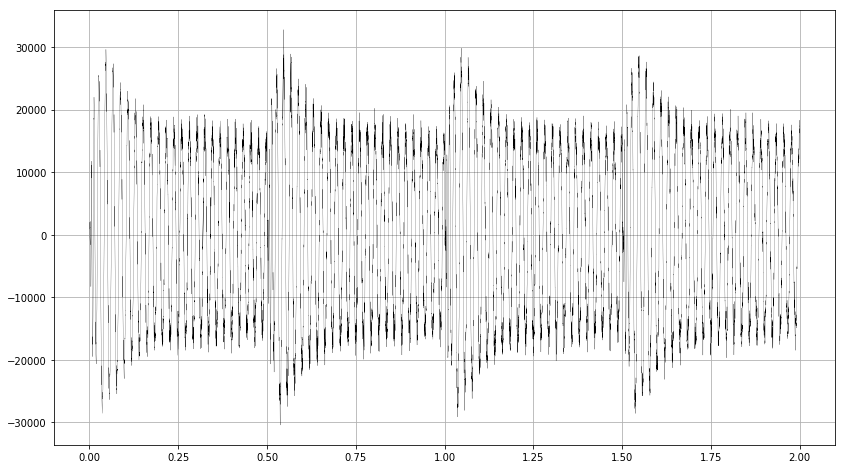

In [181]:
from scipy.io import wavfile
rate, x = wavfile.read('bar.wav') 
signal = x[:, 0] # left channel
N = len(signal)
print(N)
t = np.linspace(0, N/rate, N)
plt.grid()
plt.plot(t, signal, 'k-', linewidth=0.2)

In [93]:
signal.shape

(88200,)

In [110]:
nperseg  = 11025//2
noverlap = nperseg // 100 * 98
step = nperseg - noverlap


f_N = nperseg // 4

spectrogram = np.empty( ((signal.shape[-1] - noverlap) // step, f_N) )
# spectrogram = np.empty( (nperseg, (signal.shape[-1] - noverlap) // step)  )
print(spectrogram.shape)

t_chunk = np.linspace(0, nperseg / rate, nperseg)
# f = np.linspace(30, nperseg//2, f_N) # second arg: nperseg//2 (Nyquist limit)
f = np.geomspace(30, nperseg//2, f_N) # second arg: nperseg//2 (Nyquist limit)


T_chunk, F_chunk = np.meshgrid(t_chunk, f)
# E = np.exp(-2j * np.pi * F_chunk * T_chunk)
# E = np.cos(2 * np.pi * F_chunk * T_chunk)
E = np.cos(2 * np.pi * F_chunk * T_chunk) - 1j * np.sin(2 * np.pi * F_chunk * T_chunk)
print('E', E.shape)
j = 0
for i in range(0, N, step):
    print(j, end=' ')
    if j % 40 == 0:
        print('\n', end='')
    chunk = signal[i : i + nperseg]
    
    if E.shape[1] == chunk.shape[0]:
#         print(chunk.shape, np.hanning(nperseg).shape)
#         chunk = chunk * np.hamming(nperseg)
#         chunk = chunk * np.bartlett(nperseg)
  
#         chunk = chunk * np.blackman(nperseg)
        corr = E @ chunk
        magnitude = np.abs(corr)
    
#         print(spectrogram.shape, magnitude.shape)
        spectrogram[j] = magnitude
        j += 1

(678, 1378)
E (1378, 5512)
0 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 
41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 
81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 

(1378, 678) (1378, 678) (1378, 678)


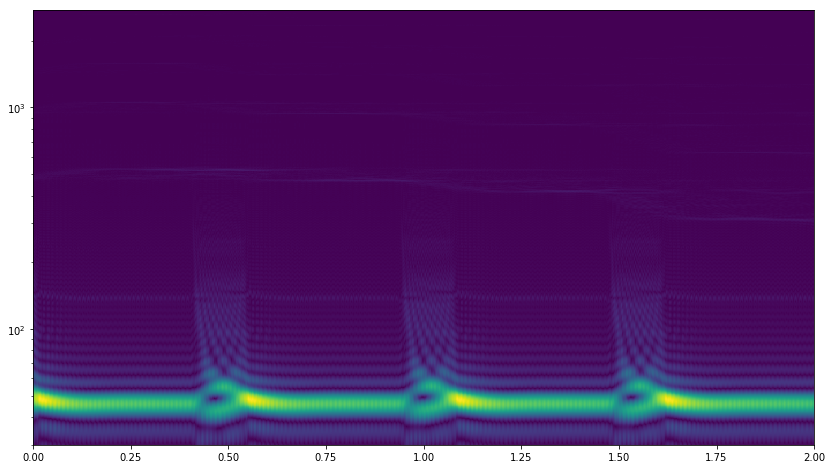

In [111]:
t_for_spectrogram = np.linspace(0, N/rate, j)
T, F = np.meshgrid(t_for_spectrogram, f)
spec_filtered = np.copy(spectrogram.T)
print(T.shape, F.shape, spec_filtered.shape)
plt.pcolormesh(T, F, spec_filtered, cmap='viridis')
freqlines = np.array([261, 350, 372, 415])
plt.semilogy()
plt.grid(False)
plt.show()

In [ ]:
f = np.geomspace(30, nperseg//2, f_N) # second arg: nperseg//2 (Nyquist limit)

f_N = nperseg // 16

T, P = np.meshgrid(t, phases)

SDP = np.sin(2*np.pi*f*T + P) # Sines of Different Phases

plt.pcolormesh(T, P, SDP)

In [ ]:
nperseg  = 11025//2
noverlap = nperseg // 100 * 92
step = nperseg - noverlap

# Creating Sawtooth pack (similar to `sin` pack)
## 1. without `cos - 1j * sin`

In [134]:
t = np.linspace(0, 2, 2**13)
f = np.geomspace(1, 1000, 600)


T, F = np.meshgrid(t, f)
# E = np.exp(-2j * np.pi * F_chunk * T_chunk)
# E = np.cos(2 * np.pi * F_chunk * T_chunk)
E  = np.sin(2 * np.pi * T * F)
ST = 2 * (T * F - np.floor(1/2 + T * F))

print('E', E.shape)

E (600, 8192)


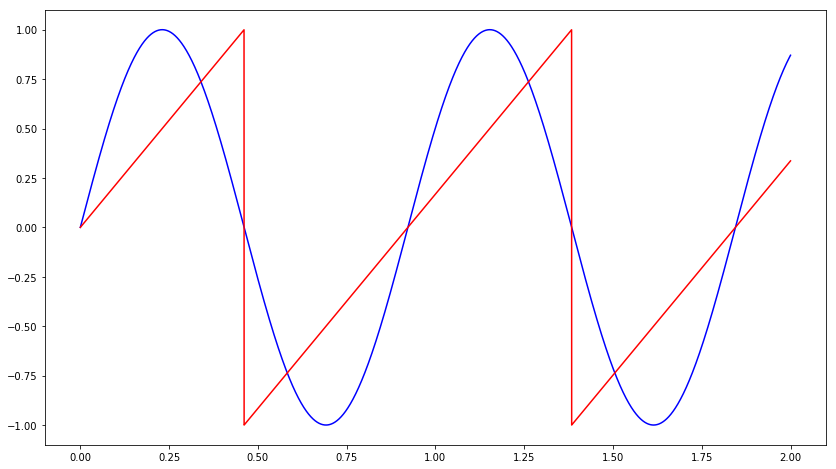

In [135]:
# plt.pcolormesh(T, F, E)

i = 7
plt.plot(t, E[i], 'b')
plt.plot(t, ST[i], 'r')

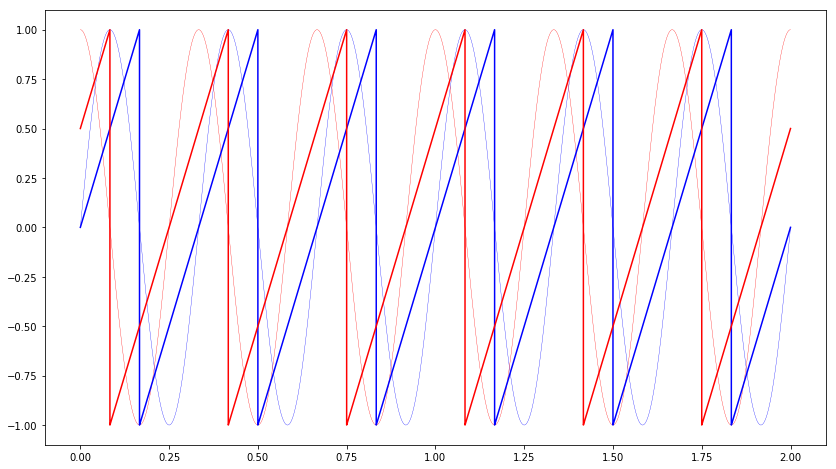

In [180]:
from scipy.signal import sawtooth

f = 3
s = np.sin(2 * np.pi * f * t)
c = np.cos(2 * np.pi * f * t) 

ss = sawtooth(2 * np.pi * f * t - np.pi)
sc = sawtooth(2 * np.pi * f * t - np.pi / 2)
# ss = 2 * (f*t - np.floor(1/2 + f*t))
# sc = 2 * (f*(t - 1/4) - np.floor(1/2 + f*(t - 1/4)))

plt.plot(t, s, 'b', linewidth=0.3)
plt.plot(t, c, 'r', linewidth=0.3)
plt.plot(t, ss, 'b')
plt.plot(t, sc, 'r')

## with `cos - 1j * sin`

In [182]:
nperseg  = 11025//2
noverlap = nperseg // 100 * 98
step = nperseg - noverlap


f_N = nperseg // 4

spectrogram = np.empty( ((signal.shape[-1] - noverlap) // step, f_N) )
# spectrogram = np.empty( (nperseg, (signal.shape[-1] - noverlap) // step)  )
print(spectrogram.shape)

t_chunk = np.linspace(0, nperseg / rate, nperseg)
# f = np.linspace(30, nperseg//2, f_N) # second arg: nperseg//2 (Nyquist limit)
f = np.geomspace(30, nperseg//2, f_N) # second arg: nperseg//2 (Nyquist limit)


T_chunk, F_chunk = np.meshgrid(t_chunk, f)
# E = np.exp(-2j * np.pi * F_chunk * T_chunk)
# E = np.cos(2 * np.pi * F_chunk * T_chunk)

# ss = signal.sawtooth(2 * np.pi * f * t - np.pi)
# sc = signal.sawtooth(2 * np.pi * f * t - np.pi / 2)
# E = np.cos(2 * np.pi * F_chunk * T_chunk)                    - 1j * np.sin(2 * np.pi * F_chunk * T_chunk)
E = sawtooth(2 * np.pi * F_chunk * T_chunk - np.pi / 2) - 1j * sawtooth(2 * np.pi * F_chunk * T_chunk - np.pi)

print('E', E.shape)
j = 0
for i in range(0, N, step):
    print(j, end=' ')
    if j % 40 == 0:
        print('\n', end='')
    chunk = signal[i : i + nperseg]
    
    if E.shape[1] == chunk.shape[0]:
#         print(chunk.shape, np.hanning(nperseg).shape)
#         chunk = chunk * np.hamming(nperseg)
#         chunk = chunk * np.bartlett(nperseg)
  
#         chunk = chunk * np.blackman(nperseg)
        corr = E @ chunk
        magnitude = np.abs(corr)
    
#         print(spectrogram.shape, magnitude.shape)
        spectrogram[j] = magnitude
        j += 1

(678, 1378)
E (1378, 5512)
0 
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 
41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 
81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 
241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 

(1378, 678) (1378, 678) (1378, 678)


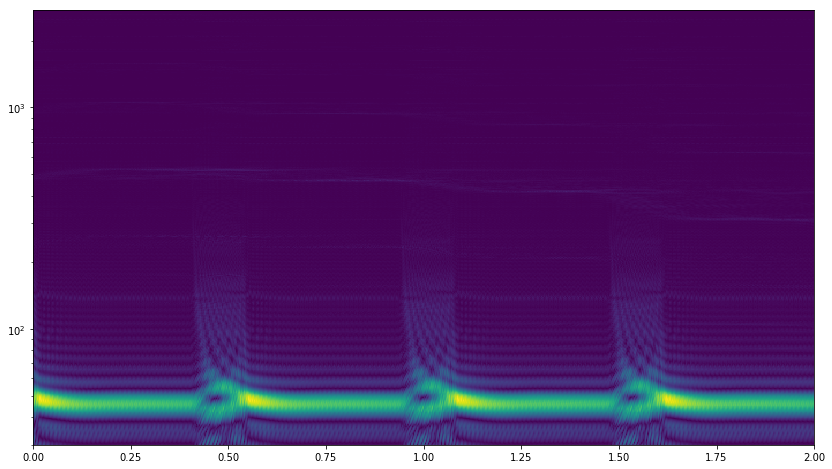

In [183]:
t_for_spectrogram = np.linspace(0, N/rate, j)
T, F = np.meshgrid(t_for_spectrogram, f)
spec_filtered = np.copy(spectrogram.T)
print(T.shape, F.shape, spec_filtered.shape)
plt.pcolormesh(T, F, spec_filtered, cmap='viridis')
freqlines = np.array([261, 350, 372, 415])
plt.semilogy()
plt.grid(False)
plt.show()